<a href="https://colab.research.google.com/github/NguyenNgocQuyen29/XLA/blob/main/CT_KIDNEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1. Khai báo các thư viện cần sử dụng ***

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pickle 
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

**2. Kết nối với Google Drive để đọc và lưu dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3. Khai báo đường dẫn,đọc và xử lí hình ảnh**

In [ ]:
datadir = "/content/drive/MyDrive/XLA/Train"

IMG_SIZE = 100
#sắp xếp nhãn dữ liệu
categories = ["Cyst" , "Normal", "Stone" ,"Tumor"]
training_data = []

#đọc hình ảnh và xử lí hình ảnh trong thư mục hiện tại ,hình ảnh đọc được là ảnh xám,thay đổi kích thước và thêm vào danh sách training_data tương ứng với số lớp tương ứng

def create_training_data(): #hàm do người dùng định nghĩa,có khả năng tạo dữ liệu huấn luyện
    for category in categories:   #category sẽ lấy giá trị trong danh sach categories

 #bên trong vòng lặp tạo một đường dẫn đến thư mục hiện tại bằng cách sử dụng os.path.join() ,trong đó datadir là thư mục chính chứa tất cả thư mục (train), category là thư mục đang được xử lí 
        path = os.path.join(datadir,category)  
#xác định số class trong thư mục ,số lớp nó sẽ đại diện cho chỉ mục của danh mục hiện tại 
        class_num = categories.index(category)  

#tqdm tạo thanh tiến trình ,theo dõi quá trình xử lí trong vòng lặp

        for img in tqdm(os.listdir(path)): #lặp qua từng tệp tin trong cái danh sách (os.listdir(path) được trả về với img: là tên của mỗi tệp tin trong danh sách
        #các dòng lệnh trong khối try được thực thi để đọc và xử lí nếu có bất kì lỗi nào trong quá trình đọc và thực thi thì khối lệnh except sẽ xử lí
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  #đọc hình ảnh từ đường dẫn được tạo bằng cách kết hợp path với img(hình ảnh đọc đc lưu trong biến ing_array) , trong trường hợp này mình sẽ đọc ảnh xám
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  #thay đổi kích thước thành kích thước mong muốn (100,100),hình ảnh sau khi thay đổi lưu vào trong biến neww_array
                training_data.append([new_array, class_num])  #thêm thư mục mới vào trong danh sách training_data,bao gồm hình ảnh sau khi thay thổi kích thước (new_array) và số lớp tương ứng (class_num)
            except Exception as e:  #khối lệnh trong try nếu có lỗi sẽ bị bắt lỗi bỡi exception và lỗi được gán cho e ,trong trường hợp này bỏ qua
                pass
create_training_data()

print("Số lượng dữ liệu huấn luyện:", len(training_data)) #xem độ dài của training_Data

100%|██████████| 2224/2224 [00:14<00:00, 153.95it/s]

Số lượng dữ liệu huấn luyện: 10040


**4. Xử lí danh sách,tách và định hình lại các mảng tính năng và in ra hình dạng của mảng tinh năng và nhãn**

In [ ]:
#tạo danh sách trống để lưu trữ tính năng (dữ liệu hình ảnh) và nhãn tương ứng
X = []
y = []

for features,label in training_data:  #lặp lại từng phần tử trong danh sách training_data, mỗi phần tử bao gốm tính năng vã nhãn
#thu thập dữ liệu hình ảnh và các nhãn tương ứng vào các danh sách riêng biệt
    X.append(features)   #nối tính năng vào danh sách X
    y.append(label)      #nối nhãn vào danh sách Y
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  #chuyển đổi danh sách X thành mảng numpy,tạo ra một mảng numpy gồm danh sách dữ liệu hình ảnh, -1 dùng để suy ra số lượng mẫu;size:kích thước,1 là số lượng kênh màu (xám)
y = np.array(y) #chuyển đổi danh sách Y thành mảng numpy,tạo ra một mảng numpy gồm danh sách nhãn

#hiển thị kích thước của các mảng
print('X:',X.shape)
print('y:',y.shape)


X: (10040, 100, 100, 1)
y: (10040,)


In [ ]:

pickle_out = open("/content/drive/MyDrive/XLA/save/X1.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/XLA/save/y1.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

print("Hoàn thành xây dựng tập dữ liệu")

Hoàn thành xây dựng tập dữ liệu


**5. Xây dựng mô hình**

In [ ]:
#khai báo các thư viện cần thiết
import numpy as np
import pickle
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten, Dropout
from keras.layers import MaxPool2D, Conv2D
from keras.utils import np_utils

In [ ]:
#Load X, y từ file pickle ở drive và kiểm tra
pickle_in = open("/content/drive/MyDrive/XLA/save/X1.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("/content/drive/MyDrive/XLA/save/y1.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

print('X:',X.shape)
print('y:',y.shape)

X: (10040, 100, 100, 1)
y: (10040,)


In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
#mô hình này chỉ sử dụng 3 lớp CNN vì nó chỉ phân loại 4 lớp khác nhau
model = Sequential()

#layer1
model.add(Conv2D(32,(3,3), padding='same', activation = 'relu', input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

#layer2
model.add(Conv2D(64,(3,3),padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

#layer3
model.add(Conv2D(128,(3,3),padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

#FCN layer
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
# Tiến hành huấn luyện mô hình
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, batch_size = 16, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
502/502 [==============================] - 124s 246ms/step - loss: 0.1583 - accuracy: 0.9401 - val_loss: 9.9927 - val_accuracy: 0.2082
Epoch 2/10
502/502 [==============================] - 123s 246ms/step - loss: 0.0116 - accuracy: 0.9971 - val_loss: 11.1463 - val_accuracy: 0.2326
Epoch 3/10
502/502 [==============================] - 127s 252ms/step - loss: 7.9032e-05 - accuracy: 1.0000 - val_loss: 12.0707 - val_accuracy: 0.2311
Epoch 4/10
502/502 [==============================] - 129s 256ms/step - loss: 3.5159e-05 - accuracy: 1.0000 - val_loss: 12.8671 - val_accuracy: 0.2331
Epoch 5/10
502/502 [==============================] - 124s 247ms/step - loss: 2.0617e-05 - accuracy: 1.0000 - val_loss: 13.4359 - val_accuracy: 0.2321
Epoch 6/10
502/502 [==============================] - 128s 255ms/step - loss: 1.2650e-05 - accuracy: 1.0000 - val_loss: 13.8644 - val_accuracy: 0.2336
Epoch 7/10
502/502 [==============================] - 124s 247ms/step - loss: 8.3688e-06 - accuracy: 1.

In [ ]:
#Lưu model vào drive
model.save('/content/drive/MyDrive/XLA/KIDNEY.h5')

In [ ]:
#@title test model
import cv2
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model

#Load model từ drive
model = load_model('/content/drive/MyDrive/XLA/KIDNEY.h5')

#Kiểm tra model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 128)     

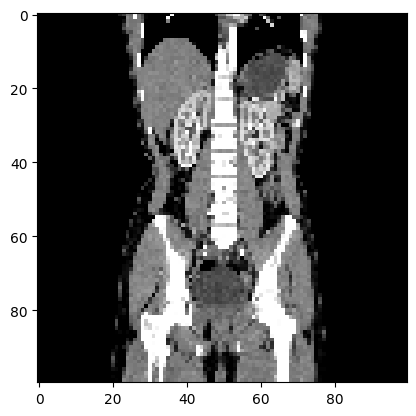

Hình ảnh đã qua xử lí


In [ ]:
#Chọn link drive hình ảnh cần test
img_test = '/content/drive/MyDrive/XLA/Test/Normal/Normal- (1225).jpg'

#Xử lí ảnh trước khi phân loại
categories = ["Cyst" , "Normal", "Stone" ,"Tumor"]
def prepare(filepath):
  IMG_SIZE =100
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (100,100))
  new_array = new_array/255.0
  return new_array.reshape(-1,100,100,1)

#Hiển thị ảnh đã qua xử lí
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()
print('Hình ảnh đã qua xử lí')

In [ ]:
prediction = model.predict([prepare(img_test)])
print('Tên bệnh: ' + str(categories[int(np.argmax(prediction))]))

#Phân loại

1/1 [==============================] - 0s 31ms/step
Tên bệnh: Normal


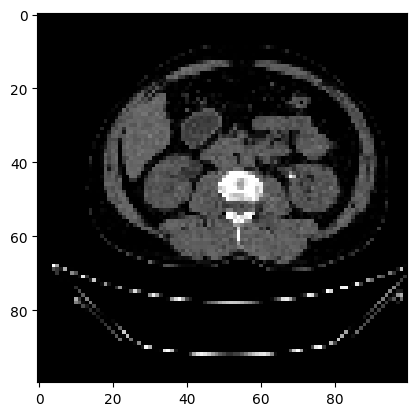

Hình ảnh đã qua xử lí


In [ ]:
#Chọn link drive hình ảnh cần test
img_test = '/content/drive/MyDrive/XLA/Test/Stone/Stone- (1326).jpg'

#Xử lí ảnh trước khi phân loại
categories = ["Cyst" , "Normal", "Stone" ,"Tumor"]
def prepare(filepath):
  IMG_SIZE =100
  img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (100,100))
  new_array = new_array/255.0
  return new_array.reshape(-1,100,100,1)

#Hiển thị ảnh đã qua xử lí
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()
print('Hình ảnh đã qua xử lí')

In [ ]:
plt.show()

prediction = model.predict([prepare(img_test)])
print(prediction)
print('Giá trị dự đoán: ' + str(np.argmax(prediction)))
print('')
print('Tên bệnh: ' + str(categories[int(np.argmax(prediction))]))

#Phân loại

1/1 [==============================] - 0s 26ms/step
[[1.5508153e-17 2.2726458e-17 1.0000000e+00 5.5513868e-20]]
Giá trị dự đoán: 2

Tên bệnh: Stone
